<a href="https://colab.research.google.com/github/hassiahk/Double-Hard-Debias/blob/main/notebooks/GloVe_Evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import codecs
import os
import json
import operator
import pickle
import random
import numpy as np
from numpy import linalg as LA
import scipy.spatial
import warnings

warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [ ]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything()

In [ ]:
from double_hard_debias.utils import load_glove_txt


def normalize(word_vec):
    """
    Normalize vectors
    """
    norms = np.apply_along_axis(LA.norm, 1, word_vec)
    word_vec = word_vec / norms[:, np.newaxis]
    return word_vec


def debias_gn(word_vec):
    """
    Removes the gender component
    """
    for vector in word_vec:
        assert(len(vector) == 300)
    
    word_vec = word_vec[:,:-1]

    for vector in word_vec:
        assert(len(v) == 299)
    return word_vec

In [ ]:
glove, glove_word2idx, vocab = load_glove_txt("../data/vectors.txt")
gn_glove, gn_glove_word2idx, gn_vocab = load_glove_txt("../data/vectors300.txt")
gn_glove_a = debias_gn(gn_glove)

322636 (322636, 300) 322636
322636 (322636, 300) 322636


In [ ]:
gp_glove, gp_glove_word2idx, gp_vocab = load_glove_txt("../data/gp_glove.txt")
gp_gn_glove, gp_gn_glove_word2idx, gp_gn_vocab = load_glove_txt("../data/gp_gn_glove.txt")

hd_glove, hd_glove_word2idx, hd_vocab = load_glove_txt("../data/vectors_hd.txt")
hd_glove_a, hd_glove_a_word2idx, hd_vocab_a = load_glove_txt("../data/vectors_hd_a.txt")

322636 300

322636 (322636, 300) 322636
322636 300

322636 (322636, 300) 322636
322636 (322636, 300) 322636
322636 (322636, 300) 322636


In [ ]:
from double_hard_debias.evaluate import evaluate_concept_categorization, evaluate_word_analogy

### Concept Categorization

In [ ]:
evaluate_concept_categorization(glove, glove_word2idx, vocab, seed=42)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['architect']" is assigned class creator
exist 401 in 402
Cluster purity on AP 0.5610972568578554
Sample data from ESSLI_2c, num of samples: 45 : "['evaluate']" is assigned class mentalState-cognition
exist 45 in 45
Cluster purity on ESSLI_2c 0.5777777777777778
Sample data from ESSLI_2b, num of samples: 40 : "['chicken']" is assigned class HI
exist 40 in 40
Cluster purity on ESSLI_2b 0.775
Sample data from ESSLI_1a, num of samples: 44 : "['dog']" is assigned class groundAnimal-animal
exist 44 in 44
Cluster purity on ESSLI_1a 0.7272727272727273
Sample data from Battig, num of samples: 5231 : "aunt" is assigned class relative
exist 4125 in 5231
Cluster purity on Battig 0.49987878787878787
Sample data from BLESS, num of samples: 200 : "['axe']" is assigned class tool
exist 200 in 200
Cluster purity on BLESS 0.81


In [ ]:
evaluate_concept_categorization(gn_glove, gn_glove_word2idx, gn_vocab, seed=42)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['architect']" is assigned class creator
exist 401 in 402
Cluster purity on AP 0.5685785536159601
Sample data from ESSLI_2c, num of samples: 45 : "['evaluate']" is assigned class mentalState-cognition
exist 45 in 45
Cluster purity on ESSLI_2c 0.5777777777777778
Sample data from ESSLI_2b, num of samples: 40 : "['chicken']" is assigned class HI
exist 40 in 40
Cluster purity on ESSLI_2b 0.75
Sample data from ESSLI_1a, num of samples: 44 : "['dog']" is assigned class groundAnimal-animal
exist 44 in 44
Cluster purity on ESSLI_1a 0.75
Sample data from Battig, num of samples: 5231 : "aunt" is assigned class relative
exist 4125 in 5231
Cluster purity on Battig 0.4761212121212121
Sample data from BLESS, num of samples: 200 : "['axe']" is assigned class tool
exist 200 in 200
Cluster purity on BLESS 0.85


In [ ]:
evaluate_concept_categorization(gn_glove_a, gn_glove_word2idx, gn_vocab, seed=42)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['architect']" is assigned class creator
exist 401 in 402
Cluster purity on AP 0.5685785536159601
Sample data from ESSLI_2c, num of samples: 45 : "['evaluate']" is assigned class mentalState-cognition
exist 45 in 45
Cluster purity on ESSLI_2c 0.5777777777777778
Sample data from ESSLI_2b, num of samples: 40 : "['chicken']" is assigned class HI
exist 40 in 40
Cluster purity on ESSLI_2b 0.75
Sample data from ESSLI_1a, num of samples: 44 : "['dog']" is assigned class groundAnimal-animal
exist 44 in 44
Cluster purity on ESSLI_1a 0.7272727272727273
Sample data from Battig, num of samples: 5231 : "aunt" is assigned class relative
exist 4125 in 5231
Cluster purity on Battig 0.5015757575757576
Sample data from BLESS, num of samples: 200 : "['axe']" is assigned class tool
exist 200 in 200
Cluster purity on BLESS 0.8250000000000001


In [ ]:
evaluate_concept_categorization(gp_glove, gp_glove_word2idx, gp_vocab, seed=42)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['architect']" is assigned class creator
exist 401 in 402
Cluster purity on AP 0.5610972568578554
Sample data from ESSLI_2c, num of samples: 45 : "['evaluate']" is assigned class mentalState-cognition
exist 45 in 45
Cluster purity on ESSLI_2c 0.5777777777777778
Sample data from ESSLI_2b, num of samples: 40 : "['chicken']" is assigned class HI
exist 40 in 40
Cluster purity on ESSLI_2b 0.775
Sample data from ESSLI_1a, num of samples: 44 : "['dog']" is assigned class groundAnimal-animal
exist 44 in 44
Cluster purity on ESSLI_1a 0.7272727272727273
Sample data from Battig, num of samples: 5231 : "aunt" is assigned class relative
exist 4125 in 5231
Cluster purity on Battig 0.4896969696969697
Sample data from BLESS, num of samples: 200 : "['axe']" is assigned class tool
exist 200 in 200
Cluster purity on BLESS 0.785


In [ ]:
evaluate_concept_categorization(gp_gn_glove, gp_gn_glove_word2idx, gp_gn_vocab, seed=42)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['architect']" is assigned class creator
exist 401 in 402
Cluster purity on AP 0.6109725685785536
Sample data from ESSLI_2c, num of samples: 45 : "['evaluate']" is assigned class mentalState-cognition
exist 45 in 45
Cluster purity on ESSLI_2c 0.5777777777777778
Sample data from ESSLI_2b, num of samples: 40 : "['chicken']" is assigned class HI
exist 40 in 40
Cluster purity on ESSLI_2b 0.75
Sample data from ESSLI_1a, num of samples: 44 : "['dog']" is assigned class groundAnimal-animal
exist 44 in 44
Cluster purity on ESSLI_1a 0.7045454545454546
Sample data from Battig, num of samples: 5231 : "aunt" is assigned class relative
exist 4125 in 5231
Cluster purity on Battig 0.5093333333333333
Sample data from BLESS, num of samples: 200 : "['axe']" is assigned class tool
exist 200 in 200
Cluster purity on BLESS 0.775


In [ ]:
evaluate_concept_categorization(hd_glove, hd_glove_word2idx, hd_vocab, seed=42)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['architect']" is assigned class creator
exist 401 in 402
Cluster purity on AP 0.6234413965087282
Sample data from ESSLI_2c, num of samples: 45 : "['evaluate']" is assigned class mentalState-cognition
exist 45 in 45
Cluster purity on ESSLI_2c 0.6444444444444445
Sample data from ESSLI_2b, num of samples: 40 : "['chicken']" is assigned class HI
exist 40 in 40
Cluster purity on ESSLI_2b 0.8
Sample data from ESSLI_1a, num of samples: 44 : "['dog']" is assigned class groundAnimal-animal
exist 44 in 44
Cluster purity on ESSLI_1a 0.7954545454545455
Sample data from Battig, num of samples: 5231 : "aunt" is assigned class relative
exist 4125 in 5231
Cluster purity on Battig 0.4829090909090909
Sample data from BLESS, num of samples: 200 : "['axe']" is assigned class tool
exist 200 in 200
Cluster purity on BLESS 0.845


In [ ]:
evaluate_concept_categorization(hd_glove_a, hd_glove_a_word2idx, hd_vocab_a, seed=42)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['architect']" is assigned class creator
exist 401 in 402
Cluster purity on AP 0.6234413965087282
Sample data from ESSLI_2c, num of samples: 45 : "['evaluate']" is assigned class mentalState-cognition
exist 45 in 45
Cluster purity on ESSLI_2c 0.6444444444444445
Sample data from ESSLI_2b, num of samples: 40 : "['chicken']" is assigned class HI
exist 40 in 40
Cluster purity on ESSLI_2b 0.8
Sample data from ESSLI_1a, num of samples: 44 : "['dog']" is assigned class groundAnimal-animal
exist 44 in 44
Cluster purity on ESSLI_1a 0.7954545454545455
Sample data from Battig, num of samples: 5231 : "aunt" is assigned class relative
exist 4125 in 5231
Cluster purity on Battig 0.5093333333333333
Sample data from BLESS, num of samples: 200 : "['axe']" is assigned class tool
exist 200 in 200
Cluster purity on BLESS 0.845


In [ ]:
evaluate_concept_categorization(dhd_glove_reproduced, dhd_glove_word2idx_reproduced, dhd_vocab_reproduced, seed=42)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['architect']" is assigned class creator
exist 401 in 402
Cluster purity on AP 0.5960099750623441
Sample data from ESSLI_2c, num of samples: 45 : "['evaluate']" is assigned class mentalState-cognition
exist 45 in 45
Cluster purity on ESSLI_2c 0.5777777777777778
Sample data from ESSLI_2b, num of samples: 40 : "['chicken']" is assigned class HI
exist 40 in 40
Cluster purity on ESSLI_2b 0.75
Sample data from ESSLI_1a, num of samples: 44 : "['dog']" is assigned class groundAnimal-animal
exist 44 in 44
Cluster purity on ESSLI_1a 0.7272727272727273
Sample data from Battig, num of samples: 5231 : "aunt" is assigned class relative
exist 4125 in 5231
Cluster purity on Battig 0.46715151515151515
Sample data from BLESS, num of samples: 200 : "['axe']" is assigned class tool
exist 200 in 200
Cluster purity on BLESS 0.795


### Word Analogy

In [ ]:
evaluate_word_analogy(glove, glove_word2idx, vocab)

6750
ACCURACY TOP1-MSR: 54.24% (3661/6750)
capital-common-countries.txt:
ACCURACY TOP1: 96.44% (488/506)
capital-world.txt:
ACCURACY TOP1: 96.35% (4359/4524)
currency.txt:
ACCURACY TOP1: 6.58% (57/866)
city-in-state.txt:
ACCURACY TOP1: 72.64% (1792/2467)
family.txt:
ACCURACY TOP1: 87.35% (442/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 20.97% (208/992)
gram2-opposite.txt:
ACCURACY TOP1: 28.94% (235/812)
gram3-comparative.txt:
ACCURACY TOP1: 85.29% (1136/1332)
gram4-superlative.txt:
ACCURACY TOP1: 49.02% (550/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 63.16% (667/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 91.99% (1471/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 56.35% (879/1560)
gram8-plural.txt:
ACCURACY TOP1: 78.68% (1048/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 58.16% (506/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 80.48%  (7138/8869)
Syntactic accuracy: 62.76%  (6700/10675)
Total accuracy: 70.80%  (13838/19544)
Analogy prediction

In [ ]:
evaluate_word_analogy(gn_glove, gn_glove_word2idx, gn_vocab)

6750
ACCURACY TOP1-MSR: 51.79% (3496/6750)
capital-common-countries.txt:
ACCURACY TOP1: 96.44% (488/506)
capital-world.txt:
ACCURACY TOP1: 96.07% (4346/4524)
currency.txt:
ACCURACY TOP1: 7.51% (65/866)
city-in-state.txt:
ACCURACY TOP1: 64.57% (1593/2467)
family.txt:
ACCURACY TOP1: 77.47% (392/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 20.77% (206/992)
gram2-opposite.txt:
ACCURACY TOP1: 26.85% (218/812)
gram3-comparative.txt:
ACCURACY TOP1: 82.58% (1100/1332)
gram4-superlative.txt:
ACCURACY TOP1: 48.04% (539/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 57.95% (612/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 91.12% (1457/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 55.58% (867/1560)
gram8-plural.txt:
ACCURACY TOP1: 78.38% (1044/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 61.26% (533/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 77.62%  (6884/8869)
Syntactic accuracy: 61.60%  (6576/10675)
Total accuracy: 68.87%  (13460/19544)
Analogy prediction

In [ ]:
evaluate_word_analogy(gn_glove_a, gn_glove_word2idx, gn_vocab)

6750
ACCURACY TOP1-MSR: 51.90% (3503/6750)
capital-common-countries.txt:
ACCURACY TOP1: 96.44% (488/506)
capital-world.txt:
ACCURACY TOP1: 96.22% (4353/4524)
currency.txt:
ACCURACY TOP1: 7.04% (61/866)
city-in-state.txt:
ACCURACY TOP1: 65.59% (1618/2467)
family.txt:
ACCURACY TOP1: 72.92% (369/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 20.67% (205/992)
gram2-opposite.txt:
ACCURACY TOP1: 27.71% (225/812)
gram3-comparative.txt:
ACCURACY TOP1: 82.43% (1098/1332)
gram4-superlative.txt:
ACCURACY TOP1: 48.93% (549/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 57.77% (610/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 91.31% (1460/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 56.28% (878/1560)
gram8-plural.txt:
ACCURACY TOP1: 77.33% (1030/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 59.43% (517/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 77.68%  (6889/8869)
Syntactic accuracy: 61.56%  (6572/10675)
Total accuracy: 68.88%  (13461/19544)
Analogy prediction

In [ ]:
evaluate_word_analogy(gp_glove, gp_glove_word2idx, gp_vocab)

6750
ACCURACY TOP1-MSR: 51.29% (3462/6750)
capital-common-countries.txt:
ACCURACY TOP1: 96.64% (489/506)
capital-world.txt:
ACCURACY TOP1: 95.56% (4323/4524)
currency.txt:
ACCURACY TOP1: 6.12% (53/866)
city-in-state.txt:
ACCURACY TOP1: 75.03% (1851/2467)
family.txt:
ACCURACY TOP1: 85.38% (432/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 22.18% (220/992)
gram2-opposite.txt:
ACCURACY TOP1: 26.48% (215/812)
gram3-comparative.txt:
ACCURACY TOP1: 84.38% (1124/1332)
gram4-superlative.txt:
ACCURACY TOP1: 46.88% (526/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 62.97% (665/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 92.18% (1474/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 53.46% (834/1560)
gram8-plural.txt:
ACCURACY TOP1: 75.90% (1011/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 59.43% (517/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 80.60%  (7148/8869)
Syntactic accuracy: 61.70%  (6586/10675)
Total accuracy: 70.27%  (13734/19544)
Analogy prediction

In [ ]:
evaluate_word_analogy(gp_gn_glove, gp_gn_glove_word2idx, gp_gn_vocab)

6750
ACCURACY TOP1-MSR: 51.81% (3497/6750)
capital-common-countries.txt:
ACCURACY TOP1: 96.84% (490/506)
capital-world.txt:
ACCURACY TOP1: 96.57% (4369/4524)
currency.txt:
ACCURACY TOP1: 5.89% (51/866)
city-in-state.txt:
ACCURACY TOP1: 66.03% (1629/2467)
family.txt:
ACCURACY TOP1: 68.58% (347/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 20.46% (203/992)
gram2-opposite.txt:
ACCURACY TOP1: 27.83% (226/812)
gram3-comparative.txt:
ACCURACY TOP1: 84.01% (1119/1332)
gram4-superlative.txt:
ACCURACY TOP1: 48.40% (543/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 56.44% (596/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 91.62% (1465/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 56.47% (881/1560)
gram8-plural.txt:
ACCURACY TOP1: 76.05% (1013/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 62.18% (541/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 77.64%  (6886/8869)
Syntactic accuracy: 61.70%  (6587/10675)
Total accuracy: 68.94%  (13473/19544)
Analogy prediction

In [ ]:
evaluate_word_analogy(hd_glove, hd_glove_word2idx, hd_vocab)

6750
ACCURACY TOP1-MSR: 54.27% (3663/6750)
capital-common-countries.txt:
ACCURACY TOP1: 96.44% (488/506)
capital-world.txt:
ACCURACY TOP1: 96.35% (4359/4524)
currency.txt:
ACCURACY TOP1: 6.47% (56/866)
city-in-state.txt:
ACCURACY TOP1: 72.68% (1793/2467)
family.txt:
ACCURACY TOP1: 83.79% (424/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 20.97% (208/992)
gram2-opposite.txt:
ACCURACY TOP1: 28.82% (234/812)
gram3-comparative.txt:
ACCURACY TOP1: 85.36% (1137/1332)
gram4-superlative.txt:
ACCURACY TOP1: 48.93% (549/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 63.26% (668/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 91.99% (1471/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 56.54% (882/1560)
gram8-plural.txt:
ACCURACY TOP1: 78.23% (1042/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 58.28% (507/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 80.28%  (7120/8869)
Syntactic accuracy: 62.74%  (6698/10675)
Total accuracy: 70.70%  (13818/19544)
Analogy prediction

In [ ]:
evaluate_word_analogy(hd_glove_a, hd_glove_a_word2idx, hd_vocab_a)

6750
ACCURACY TOP1-MSR: 53.94% (3641/6750)
capital-common-countries.txt:
ACCURACY TOP1: 96.44% (488/506)
capital-world.txt:
ACCURACY TOP1: 96.35% (4359/4524)
currency.txt:
ACCURACY TOP1: 6.47% (56/866)
city-in-state.txt:
ACCURACY TOP1: 72.68% (1793/2467)
family.txt:
ACCURACY TOP1: 53.95% (273/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 20.97% (208/992)
gram2-opposite.txt:
ACCURACY TOP1: 28.82% (234/812)
gram3-comparative.txt:
ACCURACY TOP1: 85.36% (1137/1332)
gram4-superlative.txt:
ACCURACY TOP1: 48.93% (549/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 63.26% (668/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 91.99% (1471/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 56.54% (882/1560)
gram8-plural.txt:
ACCURACY TOP1: 75.68% (1008/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 58.28% (507/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 78.58%  (6969/8869)
Syntactic accuracy: 62.43%  (6664/10675)
Total accuracy: 69.76%  (13633/19544)
Analogy prediction

In [ ]:
evaluate_word_analogy(dhd_glove_reproduced, dhd_glove_word2idx_reproduced, dhd_vocab_reproduced)

6750
ACCURACY TOP1-MSR: 53.81% (3632/6750)
capital-common-countries.txt:
ACCURACY TOP1: 96.44% (488/506)
capital-world.txt:
ACCURACY TOP1: 96.68% (4374/4524)
currency.txt:
ACCURACY TOP1: 6.00% (52/866)
city-in-state.txt:
ACCURACY TOP1: 74.67% (1842/2467)
family.txt:
ACCURACY TOP1: 83.60% (423/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 21.07% (209/992)
gram2-opposite.txt:
ACCURACY TOP1: 28.33% (230/812)
gram3-comparative.txt:
ACCURACY TOP1: 84.46% (1125/1332)
gram4-superlative.txt:
ACCURACY TOP1: 47.42% (532/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 62.88% (664/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 91.99% (1471/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 54.62% (852/1560)
gram8-plural.txt:
ACCURACY TOP1: 76.43% (1018/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 55.06% (479/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 80.94%  (7179/8869)
Syntactic accuracy: 61.64%  (6580/10675)
Total accuracy: 70.40%  (13759/19544)
Analogy prediction

In [ ]:
from tqdm import tqdm
from double_hard_debias.utils import limit_vocab

gender_specific = []

with open('./data/male_word_file.txt') as f:
    for l in f:
        gender_specific.append(l.strip())
with open('./data/female_word_file.txt') as f:
    for l in f:
        gender_specific.append(l.strip())
print(len(gender_specific))

with codecs.open('./data/gender_specific_full.json') as f:
    gender_specific.extend(json.load(f))


print(len(gender_specific))

glove_limit, glove_word2idx_limit, glove_vocab_limit = limit_vocab(
    glove, glove_word2idx, vocab, exclude=gender_specific
)

gn_limit, gn_word2idx_limit, gn_vocab_limit = limit_vocab(
    gn_glove, gn_glove_word2idx, gn_vocab, exclude=gender_specific
)

gn_a_limit, gn_a_word2idx_limit, gn_a_vocab_limit = limit_vocab(
    gn_glove_a, gn_glove_word2idx, gn_vocab, exclude=gender_specific
)

gp_limit, gp_word2idx_limit, gp_vocab_limit = limit_vocab(
    gp_glove, gp_glove_word2idx, gp_vocab, exclude=gender_specific
)

gp_gn_limit, gp_gn_word2idx_limit, gp_gn_vocab_limit = limit_vocab(
    gp_gn_glove, gp_gn_glove_word2idx, gp_gn_vocab, exclude=gender_specific
)

hd_limit, hd_word2idx_limit, hd_vocab_limit = limit_vocab(
    hd_glove, hd_glove_word2idx, hd_vocab, exclude=gender_specific
)

hd_a_limit, hd_a_word2idx_limit, hd_a_vocab_limit = limit_vocab(
    hd_glove_a, hd_glove_a_word2idx, hd_vocab_a, exclude=gender_specific
)

dhd_limit, dhd_word2idx_limit, dhd_vocab_limit = limit_vocab(
    dhd_glove_reproduced, dhd_glove_word2idx_reproduced, dhd_vocab_reproduced, exclude=gender_specific
)

442


100%|██████████| 50000/50000 [00:00<00:00, 337489.88it/s]

1883
size of vocabulary: 47628



  0%|          | 0/50000 [00:00<?, ?it/s]

size of vocabulary: 47628


  0%|          | 0/50000 [00:00<?, ?it/s]

size of vocabulary: 47628


  0%|          | 0/50000 [00:00<?, ?it/s]

size of vocabulary: 47628


  0%|          | 0/50000 [00:00<?, ?it/s]

size of vocabulary: 47628


  0%|          | 0/50000 [00:00<?, ?it/s]

size of vocabulary: 47628


  0%|          | 0/50000 [00:00<?, ?it/s]

size of vocabulary: 47628


100%|██████████| 50000/50000 [00:00<00:00, 307285.82it/s]


size of vocabulary: 47628


In [ ]:
from double_hard_debias.utils import compute_bias_by_projection


he_embed = glove[glove_word2idx['he'], :]
she_embed = glove[glove_word2idx['she'], :]

gender_bias_before = compute_bias_by_projection(
    glove_limit, glove_word2idx_limit, glove_vocab_limit, he_embed, she_embed
)
sorted_g = sorted(gender_bias_before.items(), key=operator.itemgetter(1))

In [ ]:
def visualize(vectors, y_true, y_pred, ax, title, random_state):
    
    # perform TSNE
    vectors = normalize(vectors)
    X_embedded = TSNE(n_components=2, random_state=random_state).fit_transform(vectors)
    for x,p,y in zip(X_embedded, y_pred, y_true):
        if y:
            ax.scatter(x[0], x[1], marker = '.', c = 'c')
        else:
            ax.scatter(x[0], x[1], marker = 'x', c = 'darkviolet')
    
    return ax

def cluster_and_visualize(words, X1, title, random_state, tsne_random_state, y_true, num=2):
    
    kmeans_1 = KMeans(n_clusters=num, random_state=random_state).fit(X1)
    y_pred_1 = kmeans_1.predict(X1)
    correct = [1 if item1 == item2 else 0 for (item1,item2) in zip(y_true, y_pred_1) ]
    print('precision', max(sum(correct)/float(len(correct)), 1 - sum(correct)/float(len(correct))))
    
    fig, axs = plt.subplots(1, 1, figsize=(6, 3))
    ax1 = visualize(X1, y_true, y_pred_1, axs, title, tsne_random_state)
    plt.title(title)
    # fig.savefig("./figures/tsne/{}_{}_{}.pdf".format(title, size, random_state))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from double_hard_debias.utils import remove_vector_component
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline

size = 500
female = [item[0] for item in sorted_g[:size]]
male = [item[0] for item in sorted_g[-size:]]
y_true = [1]*size + [0]*size

### t-SNE Projection (van der Maaten and Hinton, 2008)

In [ ]:
random_state = 4
tsne_random_state = 5

precision 1.0


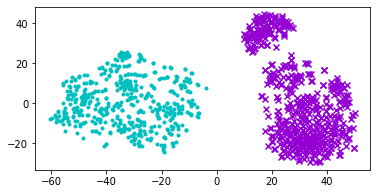

In [ ]:
cluster_and_visualize(male + female, remove_vector_component(male + female, glove_limit, glove_word2idx_limit), 
                          'GloVe', random_state, tsne_random_state, y_true)

precision 1.0


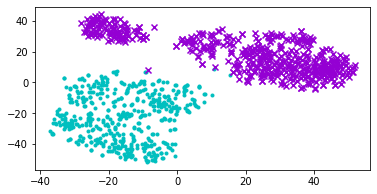

In [ ]:
cluster_and_visualize(male + female, remove_vector_component(male + female, gn_limit, gn_word2idx_limit), 
                          'GN-GloVe', random_state, tsne_random_state, y_true)

precision 0.867


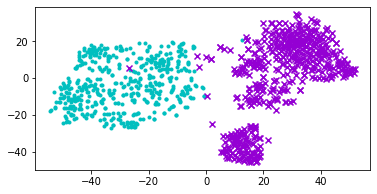

In [ ]:
cluster_and_visualize(male + female, remove_vector_component(male + female, gn_a_limit, gn_a_word2idx_limit), 
                          'GN-GloVe_a', random_state, tsne_random_state,  y_true)

precision 1.0


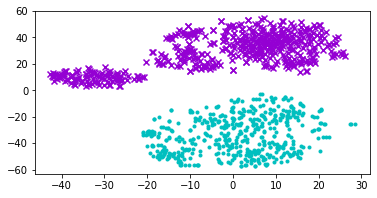

In [ ]:
cluster_and_visualize(male + female, remove_vector_component(male + female, gp_limit, gp_word2idx_limit), 
                          'GP-GloVe', random_state, tsne_random_state,  y_true)

precision 1.0


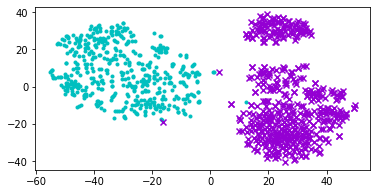

In [ ]:
cluster_and_visualize(male + female, remove_vector_component(male + female, gp_gn_limit, gp_gn_word2idx_limit), 
                          'GP-GN-GloVe', random_state, tsne_random_state, y_true)

precision 0.8029999999999999


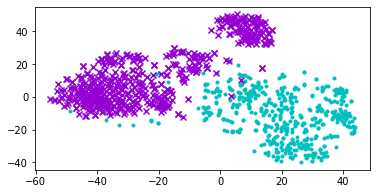

In [ ]:
cluster_and_visualize(male + female, remove_vector_component(male + female, hd_limit, hd_word2idx_limit), 
                          'Hard-GloVe', random_state, tsne_random_state, y_true)

precision 0.8029999999999999


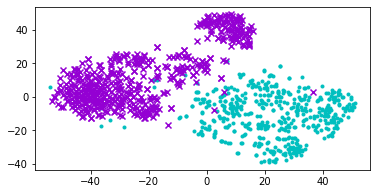

In [ ]:
cluster_and_visualize(male + female, remove_vector_component(male + female, hd_a_limit, hd_a_word2idx_limit), 
                          ' Strong-Hard-GloVe', random_state, tsne_random_state, y_true)

precision 0.742


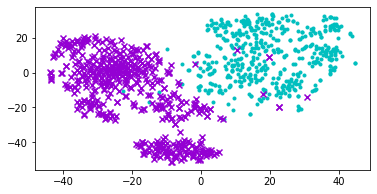

In [ ]:
cluster_and_visualize(male + female, remove_vector_component(male + female, dhd_limit, dhd_word2idx_limit), 
                          'Double-Hard-GloVe', random_state, tsne_random_state, y_true)

### Neighborhood Metric (Clustering Accuracy), (Gonen and Goldberg, 2019)

In [ ]:
def cluster(words, X1, random_state, y_true, num=2):
    
    kmeans_1 = KMeans(n_clusters=num, random_state=random_state).fit(X1)
    y_pred_1 = kmeans_1.predict(X1)
    correct = [1 if item1 == item2 else 0 for (item1,item2) in zip(y_true, y_pred_1) ]
    print('precision', max(sum(correct)/float(len(correct)), 1 - sum(correct)/float(len(correct))))

In [ ]:
def my_cluster(wv, word2idx, start=0, size=500, random_state = 1):
    
    if start == 0:
        female = [item[0] for item in sorted_g[:size]]
        male = [item[0] for item in sorted_g[-size:]]
    else:
        female = [item[0] for item in sorted_g[start:size+start]]
        male = [item[0] for item in sorted_g[-(start+size):-start]]

    y_true = [1]*size + [0]*size
    
    cluster(male + female, remove_vector_component(male + female, wv, word2idx), random_state, y_true)

In [ ]:
random_state_ = 0
start = 0
end = 100
my_cluster(glove_limit, glove_word2idx_limit, start, end, random_state=random_state_)
my_cluster(gn_limit, gn_word2idx_limit, start, end, random_state=random_state_)
my_cluster(gn_a_limit, gn_a_word2idx_limit, start, end, random_state=random_state_)
my_cluster(gp_limit, gp_word2idx_limit, start, end, random_state=random_state_)
my_cluster(gp_gn_limit, gp_gn_word2idx_limit, start, end, random_state=random_state_)
my_cluster(hd_limit, hd_word2idx_limit, start, end, random_state=random_state_)
my_cluster(hd_a_limit, hd_a_word2idx_limit, start, end, random_state=random_state_)
my_cluster(dhd_limit, dhd_word2idx_limit, start, end, random_state=random_state_)

precision 1.0
precision 1.0
precision 1.0
precision 1.0
precision 1.0
precision 0.765
precision 0.765
precision 0.665


In [ ]:
random_state_ = 0
start = 0
end = 500
my_cluster(glove_limit, glove_word2idx_limit, start, end, random_state=random_state_)
my_cluster(gn_limit, gn_word2idx_limit, start, end, random_state=random_state_)
my_cluster(gn_a_limit, gn_a_word2idx_limit, start, end, random_state=random_state_)
my_cluster(gp_limit, gp_word2idx_limit, start, end, random_state=random_state_)
my_cluster(gp_gn_limit, gp_gn_word2idx_limit, start, end, random_state=random_state_)
my_cluster(hd_limit, hd_word2idx_limit, start, end, random_state=random_state_)
my_cluster(hd_a_limit, hd_a_word2idx_limit, start, end, random_state=random_state_)
my_cluster(dhd_limit, dhd_word2idx_limit, start, end, random_state=random_state_)

precision 1.0
precision 1.0
precision 0.995
precision 1.0
precision 1.0
precision 0.8029999999999999
precision 0.8029999999999999
precision 0.741


In [ ]:
random_state_ = 0
start = 0
end = 1000
my_cluster(glove_limit, glove_word2idx_limit, start, end, random_state=random_state_)
my_cluster(gn_limit, gn_word2idx_limit, start, end, random_state=random_state_)
my_cluster(gn_a_limit, gn_a_word2idx_limit, start, end, random_state=random_state_)
my_cluster(gp_limit, gp_word2idx_limit, start, end, random_state=random_state_)
my_cluster(gp_gn_limit, gp_gn_word2idx_limit, start, end, random_state=random_state_)
my_cluster(hd_limit, hd_word2idx_limit, start, end, random_state=random_state_)
my_cluster(hd_a_limit, hd_a_word2idx_limit, start, end, random_state=random_state_)
my_cluster(dhd_limit, dhd_word2idx_limit, start, end, random_state=random_state_)

precision 1.0
precision 0.998
precision 0.8945
precision 1.0
precision 0.9995
precision 0.8025
precision 0.8025
precision 0.704


### WEAT (Caliskan et al., 2017)

In [ ]:
from double_hard_debias.utils import p_value_exhaust, effect_size
from double_hard_debias.utils import WEAT_WORDS


A = WEAT_WORDS['A']
B = WEAT_WORDS['B']
C = WEAT_WORDS['C']
D = WEAT_WORDS['D']
E = WEAT_WORDS['E']
F = WEAT_WORDS['F']
G = WEAT_WORDS['G']
H = WEAT_WORDS['H']

A = [elem.lower() for elem in A]
A = ['john', 'paul', 'mike', 'kevin', 'steve', 'greg', 'jeff', 'tom']
B = [elem.lower() for elem in B]
C = [elem.lower() for elem in C]
D = [elem.lower() for elem in D]
E = [elem.lower() for elem in E]
F = [elem.lower() for elem in F]
G = [elem.lower() for elem in G]
H = [elem.lower() for elem in H]
print(A)
print(B)
print(C)
print(D)
print(E)
print(F)
print(G)
print(H)

['john', 'paul', 'mike', 'kevin', 'steve', 'greg', 'jeff', 'tom']
['amy', 'joan', 'lisa', 'sarah', 'diana', 'kate', 'ann', 'donna']
['executive', 'management', 'professional', 'corporation', 'salary', 'office', 'business', 'career']
['home', 'parents', 'children', 'family', 'cousins', 'marriage', 'wedding', 'relatives']
['math', 'algebra', 'geometry', 'calculus', 'equations', 'computation', 'numbers', 'addition']
['poetry', 'art', 'dance', 'literature', 'novel', 'symphony', 'drama', 'sculpture']
['science', 'technology', 'physics', 'chemistry', 'einstein', 'nasa', 'experiment', 'astronomy']
['poetry', 'art', 'shakespeare', 'dance', 'literature', 'novel', 'symphony', 'drama']


In [ ]:
print(effect_size(A, B, C, D, glove, glove_word2idx, vocab))
print(effect_size(A, B, C, D, gn_glove, gn_glove_word2idx, gn_vocab))
print(effect_size(A, B, C, D, gn_glove_a, gn_glove_word2idx, gn_vocab))
print(effect_size(A, B, C, D, gp_glove, gp_glove_word2idx, gp_vocab))
print(effect_size(A, B, C, D, gp_gn_glove, gp_gn_glove_word2idx, gp_gn_vocab))
print(effect_size(A, B, C, D, hd_glove, hd_glove_word2idx, hd_vocab))
print(effect_size(A, B, C, D, hd_glove_a, hd_glove_a_word2idx, hd_vocab_a))
print(effect_size(A, B, C, D, dhd_glove_reproduced, dhd_glove_word2idx_reproduced, dhd_vocab_reproduced))

1.805996189486473
1.8211045958742451
1.7554763167372835
1.8058846500019743
1.7974306940681066
1.546645694968245
1.5466455821704757
1.5313012260878658


In [ ]:
print(effect_size(A, B, E, F, glove, glove_word2idx, vocab))
print(effect_size(A, B, E, F, gn_glove, gn_glove_word2idx, gn_vocab))
print(effect_size(A, B, E, F, gn_glove_a, gn_glove_word2idx, gn_vocab))
print(effect_size(A, B, E, F, gp_glove, gp_glove_word2idx, gp_vocab))
print(effect_size(A, B, E, F, gp_gn_glove, gp_gn_glove_word2idx, gp_gn_vocab))
print(effect_size(A, B, E, F, hd_glove, hd_glove_word2idx, hd_vocab))
print(effect_size(A, B, E, F, hd_glove_a, hd_glove_a_word2idx, hd_vocab_a))
print(effect_size(A, B, E, F, dhd_glove_reproduced, dhd_glove_word2idx_reproduced, dhd_vocab_reproduced))

0.5528808305119365
1.206909759659452
1.4272680333459622
0.8739090072893716
1.4149091958989295
0.07450990829984834
0.07451019506434306
-0.09438447602788241


In [ ]:
print(effect_size(A, B, G, H, glove, glove_word2idx, vocab))
print(effect_size(A, B, G, H, gn_glove, gn_glove_word2idx, gn_vocab))
print(effect_size(A, B, G, H, gn_glove_a, gn_glove_word2idx, gn_vocab))
print(effect_size(A, B, G, H, gp_glove, gp_glove_word2idx, gp_vocab))
print(effect_size(A, B, G, H, gp_gn_glove, gp_gn_glove_word2idx, gp_gn_vocab))
print(effect_size(A, B, G, H, hd_glove, hd_glove_word2idx, hd_vocab))
print(effect_size(A, B, G, H, hd_glove_a, hd_glove_a_word2idx, hd_vocab_a))
print(effect_size(A, B, G, H, dhd_glove_reproduced, dhd_glove_word2idx_reproduced, dhd_vocab_reproduced))

0.8793966839691493
1.0243548901586481
1.015708382863749
0.9130660186552044
1.042559518358139
-0.16228878039927028
-0.16228896283873995
-0.14963922893501877


In [ ]:
print(p_value_exhaust(A, B, C, D, glove, glove_word2idx, vocab))
print(p_value_exhaust(A, B, C, D, gn_glove, gn_glove_word2idx, gn_vocab))
print(p_value_exhaust(A, B, C, D, gn_glove_a, gn_glove_word2idx, gn_vocab))
print(p_value_exhaust(A, B, C, D, gp_glove, gp_glove_word2idx, gp_vocab))
print(p_value_exhaust(A, B, C, D, gp_gn_glove, gp_gn_glove_word2idx, gp_gn_vocab))
print(p_value_exhaust(A, B, C, D, hd_glove, hd_glove_word2idx, hd_vocab))
print(p_value_exhaust(A, B, C, D, hd_glove_a, hd_glove_a_word2idx, hd_vocab_a))
print(p_value_exhaust(A, B, C, D, dhd_glove_reproduced, dhd_glove_word2idx_reproduced, dhd_vocab_reproduced))

num of samples 12870
0.0
num of samples 12870
0.0
num of samples 12870
0.0
num of samples 12870
0.0
num of samples 12870
7.77000777000777e-05
num of samples 12870
0.0001554001554001554
num of samples 12870
0.0001554001554001554
num of samples 12870
0.0001554001554001554


In [ ]:
print(p_value_exhaust(A, B, E, F, glove, glove_word2idx, vocab))
print(p_value_exhaust(A, B, E, F, gn_glove, gn_glove_word2idx, gn_vocab))
print(p_value_exhaust(A, B, E, F, gn_glove_a, gn_glove_word2idx, gn_vocab))
print(p_value_exhaust(A, B, E, F, gp_glove, gp_glove_word2idx, gp_vocab))
print(p_value_exhaust(A, B, E, F, gp_gn_glove, gp_gn_glove_word2idx, gp_gn_vocab))
print(p_value_exhaust(A, B, E, F, hd_glove, hd_glove_word2idx, hd_vocab))
print(p_value_exhaust(A, B, E, F, hd_glove_a, hd_glove_a_word2idx, hd_vocab_a))
print(p_value_exhaust(A, B, E, F, dhd_glove_reproduced, dhd_glove_word2idx_reproduced, dhd_vocab_reproduced))

num of samples 12870
0.1393939393939394
num of samples 12870
0.005905205905205905
num of samples 12870
0.00101010101010101
num of samples 12870
0.04048174048174048
num of samples 12870
0.0012432012432012432
num of samples 12870
0.4425796425796426
num of samples 12870
0.4425796425796426
num of samples 12870
0.5717948717948718


In [ ]:
print(p_value_exhaust(A, B, G, H, glove, glove_word2idx, vocab))
print(p_value_exhaust(A, B, G, H, gn_glove, gn_glove_word2idx, gn_vocab))
print(p_value_exhaust(A, B, G, H, gn_glove_a, gn_glove_word2idx, gn_vocab))
print(p_value_exhaust(A, B, G, H, gp_glove, gp_glove_word2idx, gp_vocab))
print(p_value_exhaust(A, B, G, H, gp_gn_glove, gp_gn_glove_word2idx, gp_gn_vocab))
print(p_value_exhaust(A, B, G, H, hd_glove, hd_glove_word2idx, hd_vocab))
print(p_value_exhaust(A, B, G, H, hd_glove_a, hd_glove_a_word2idx, hd_vocab_a))
print(p_value_exhaust(A, B, G, H, dhd_glove_reproduced, dhd_glove_word2idx_reproduced, dhd_vocab_reproduced))

num of samples 12870
0.03597513597513598
num of samples 12870
0.015462315462315463
num of samples 12870
0.016394716394716395
num of samples 12870
0.033022533022533024
num of samples 12870
0.01320901320901321
num of samples 12870
0.6241647241647241
num of samples 12870
0.6240870240870241
num of samples 12870
0.6142191142191142
